Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
9
94
94
8836
Epoch 1/15
500/500 [==============================] - 5s 9ms/step - loss: 1.7415 - acc: 0.4080
Epoch 2/15
500/500 [==============================] - 4s 7ms/step - loss: 0.8336 - acc: 0.7660
Epoch 3/15
500/500 [==============================] - 4s 7ms/step - loss: 0.3563 - acc: 0.8940
Epoch 4/15
500/500 [==============================] - 4s 7ms/step - loss: 0.1895 - acc: 0.9600
Epoch 5/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0968 - acc: 0.9820
Epoch 6/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0619 - acc: 0.9920
Epoch 7/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0310 - acc: 0.9980
Epoch 8/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0215 - acc: 0.9980
Epoch 9/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0743 - acc: 0.9900
E

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:177: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


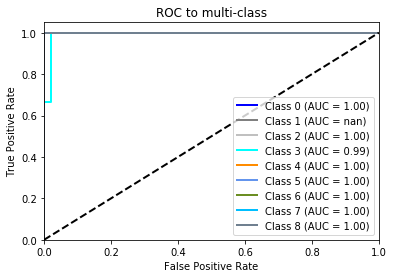

dict_keys(['loss', 'acc'])


KeyError: ignored

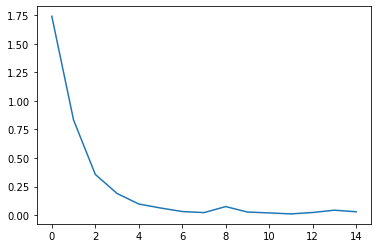

In [0]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras import optimizers


import numpy as np
import matplotlib.pyplot as plt
import csv

from os.path import join

ROOT = '/content/drive/'
PROJ = 'My Drive/Colab Notebooks/' # You need to change this parameter according to your real path.
DATA = 'My Drive/Colab Notebooks/unigram/Round1/' # You need to change this parameter according to your real path.

LEARNING_RATE = 0.001
EPOCHS = 15
MINI_BATCH = 20
DROPOUT_CONV = 0.5
FLATTEN_NODES = 128


PROJECT_PATH = join(ROOT, PROJ)
DATA_PATH = join(ROOT, DATA)

#First: mount the drive to access files 
from google.colab import drive
drive.mount(ROOT,force_remount=False)

from importlib.machinery import SourceFileLoader
data_helpers = SourceFileLoader('data_helpers', join(PROJECT_PATH, 'data_helpers_2.py')).load_module()

'''
Reading the dataset
'''
train_file = join(DATA_PATH,'train.csv')
test_file = join(DATA_PATH,'test.csv')

train_images, train_labels, test_images, test_labels, labels_count = data_helpers.load_training_and_testing_data(train_file,test_file)

#X1 = tf.reshape(X, [-1,image_width , image_height,1])

image_size = train_images.shape[1]
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint32)
print(image_width)
print(image_height)
print(image_size)

train_images = train_images.reshape(-1, image_width, image_height, 1)
test_images = test_images.reshape(-1, image_width , image_height, 1)


model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(image_height, image_width, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_CONV))


model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_CONV))

model.add(Flatten())
model.add(Dense(FLATTEN_NODES))
model.add(Activation('relu'))

model.add(Dense(labels_count))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=MINI_BATCH, epochs=EPOCHS) #validation_split=0.1, 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

y_pred  = model.predict(test_images, batch_size=64, verbose=1)
size = y_pred.shape[0]



#==================================Display precision/recall================================
print(classification_report( np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1)))
